# Calculation of Bayes Factor for CCI genes of Interest

- **Developed by**: Christian Eger
- **Würzburg Institute for Systems Immunology, Faculty of Medicine, Julius-Maximilian-Universität Würzburg**
- **Created**: 240212
- **Latest version**: 240213

## Import required modules

In [1]:
import scvi
from scvi.model import SCVI
import scanpy as sc
import matplotlib.pyplot as plt

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
scvi.settings.seed = 1712

Global seed set to 1712


## Preparing adata object

In [2]:
adata = scvi.data.read_h5ad("/mnt/LaCIE/ceger/Projects/COPD/Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad")
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [4]:
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

In [5]:
adata = adata[adata.obs["infection"] == "CTRL"]
adata

View of AnnData object with n_obs × n_vars = 49928 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    uns: 'log1p'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    layers: 'counts'

## Running scvi

In [6]:
adata = adata.copy()
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    batch_key="illumina_stimunr"
)

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [7]:
scvi.model.SCVI.setup_anndata(adata, batch_key="illumina_stimunr")

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [8]:
vae = SCVI(adata)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/160:   0%|          | 0/160 [00:00<?, ?it/s]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/160:   1%|          | 1/160 [02:16<6:01:14, 136.32s/it, v_num=1, train_loss_step=6.92e+3, train_loss_epoch=7.35e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/160:   1%|▏         | 2/160 [04:33<6:00:29, 136.90s/it, v_num=1, train_loss_step=6.72e+3, train_loss_epoch=6.62e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/160:   2%|▏         | 3/160 [06:51<5:59:22, 137.34s/it, v_num=1, train_loss_step=6.3e+3, train_loss_epoch=6.4e+3]  

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/160:   2%|▎         | 4/160 [09:06<5:54:41, 136.42s/it, v_num=1, train_loss_step=6.19e+3, train_loss_epoch=6.24e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 6/160:   3%|▎         | 5/160 [11:22<5:51:54, 136.22s/it, v_num=1, train_loss_step=6.07e+3, train_loss_epoch=6.12e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 7/160:   4%|▍         | 6/160 [13:40<5:50:59, 136.75s/it, v_num=1, train_loss_step=6.11e+3, train_loss_epoch=6.03e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 8/160:   4%|▍         | 7/160 [15:57<5:49:31, 137.07s/it, v_num=1, train_loss_step=6.07e+3, train_loss_epoch=5.96e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 9/160:   5%|▌         | 8/160 [18:15<5:47:58, 137.36s/it, v_num=1, train_loss_step=5.79e+3, train_loss_epoch=5.9e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 10/160:   6%|▌         | 9/160 [20:33<5:45:58, 137.48s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.85e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 11/160:   6%|▋         | 10/160 [22:52<5:44:33, 137.82s/it, v_num=1, train_loss_step=6e+3, train_loss_epoch=5.81e+3]   

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 12/160:   7%|▋         | 11/160 [25:12<5:44:10, 138.59s/it, v_num=1, train_loss_step=5.99e+3, train_loss_epoch=5.78e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 13/160:   8%|▊         | 12/160 [27:32<5:42:54, 139.02s/it, v_num=1, train_loss_step=5.91e+3, train_loss_epoch=5.75e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 14/160:   8%|▊         | 13/160 [29:50<5:39:53, 138.73s/it, v_num=1, train_loss_step=5.76e+3, train_loss_epoch=5.73e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 15/160:   9%|▉         | 14/160 [32:06<5:35:24, 137.84s/it, v_num=1, train_loss_step=5.99e+3, train_loss_epoch=5.71e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 16/160:   9%|▉         | 15/160 [34:22<5:31:58, 137.37s/it, v_num=1, train_loss_step=5.89e+3, train_loss_epoch=5.7e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 17/160:  10%|█         | 16/160 [36:39<5:29:25, 137.26s/it, v_num=1, train_loss_step=5.78e+3, train_loss_epoch=5.68e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 18/160:  11%|█         | 17/160 [38:56<5:26:52, 137.15s/it, v_num=1, train_loss_step=5.87e+3, train_loss_epoch=5.67e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 19/160:  11%|█▏        | 18/160 [41:13<5:24:45, 137.22s/it, v_num=1, train_loss_step=5.86e+3, train_loss_epoch=5.66e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 20/160:  12%|█▏        | 19/160 [43:28<5:20:51, 136.53s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.65e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 21/160:  12%|█▎        | 20/160 [45:45<5:18:30, 136.51s/it, v_num=1, train_loss_step=5.81e+3, train_loss_epoch=5.65e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 22/160:  13%|█▎        | 21/160 [48:02<5:16:40, 136.69s/it, v_num=1, train_loss_step=5.84e+3, train_loss_epoch=5.64e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 23/160:  14%|█▍        | 22/160 [50:19<5:14:21, 136.68s/it, v_num=1, train_loss_step=5.63e+3, train_loss_epoch=5.63e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 24/160:  14%|█▍        | 23/160 [52:35<5:12:05, 136.68s/it, v_num=1, train_loss_step=5.54e+3, train_loss_epoch=5.63e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 25/160:  15%|█▌        | 24/160 [54:51<5:09:27, 136.53s/it, v_num=1, train_loss_step=5.61e+3, train_loss_epoch=5.63e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 26/160:  16%|█▌        | 25/160 [57:08<5:07:04, 136.48s/it, v_num=1, train_loss_step=5.51e+3, train_loss_epoch=5.62e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 27/160:  16%|█▋        | 26/160 [59:24<5:04:48, 136.48s/it, v_num=1, train_loss_step=5.79e+3, train_loss_epoch=5.62e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 28/160:  17%|█▋        | 27/160 [1:01:41<5:02:38, 136.53s/it, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.61e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 29/160:  18%|█▊        | 28/160 [1:03:57<5:00:21, 136.53s/it, v_num=1, train_loss_step=5.71e+3, train_loss_epoch=5.61e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 30/160:  18%|█▊        | 29/160 [1:06:14<4:58:13, 136.59s/it, v_num=1, train_loss_step=6.02e+3, train_loss_epoch=5.61e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 31/160:  19%|█▉        | 30/160 [1:08:31<4:55:53, 136.57s/it, v_num=1, train_loss_step=5.74e+3, train_loss_epoch=5.61e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 32/160:  19%|█▉        | 31/160 [1:10:48<4:54:11, 136.83s/it, v_num=1, train_loss_step=5.5e+3, train_loss_epoch=5.61e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 33/160:  20%|██        | 32/160 [1:13:06<4:52:25, 137.08s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.6e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 34/160:  21%|██        | 33/160 [1:15:22<4:49:53, 136.95s/it, v_num=1, train_loss_step=5.6e+3, train_loss_epoch=5.6e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 35/160:  21%|██▏       | 34/160 [1:17:39<4:47:15, 136.79s/it, v_num=1, train_loss_step=5.86e+3, train_loss_epoch=5.6e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 36/160:  22%|██▏       | 35/160 [1:19:55<4:44:37, 136.62s/it, v_num=1, train_loss_step=5.6e+3, train_loss_epoch=5.6e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 37/160:  22%|██▎       | 36/160 [1:22:12<4:42:25, 136.65s/it, v_num=1, train_loss_step=5.7e+3, train_loss_epoch=5.6e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 38/160:  23%|██▎       | 37/160 [1:24:28<4:40:01, 136.60s/it, v_num=1, train_loss_step=5.41e+3, train_loss_epoch=5.6e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 39/160:  24%|██▍       | 38/160 [1:26:44<4:37:26, 136.45s/it, v_num=1, train_loss_step=5.43e+3, train_loss_epoch=5.6e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 40/160:  24%|██▍       | 39/160 [1:29:01<4:35:25, 136.57s/it, v_num=1, train_loss_step=5.73e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 41/160:  25%|██▌       | 40/160 [1:31:17<4:32:41, 136.35s/it, v_num=1, train_loss_step=5.4e+3, train_loss_epoch=5.59e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 42/160:  26%|██▌       | 41/160 [1:33:35<4:31:07, 136.70s/it, v_num=1, train_loss_step=5.31e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 43/160:  26%|██▋       | 42/160 [1:35:51<4:28:39, 136.60s/it, v_num=1, train_loss_step=5.59e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 44/160:  27%|██▋       | 43/160 [1:38:07<4:26:11, 136.51s/it, v_num=1, train_loss_step=5.57e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 45/160:  28%|██▊       | 44/160 [1:40:24<4:24:02, 136.57s/it, v_num=1, train_loss_step=5.13e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 46/160:  28%|██▊       | 45/160 [1:42:40<4:21:39, 136.52s/it, v_num=1, train_loss_step=5.65e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 47/160:  29%|██▉       | 46/160 [1:44:58<4:19:44, 136.70s/it, v_num=1, train_loss_step=5.52e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 48/160:  29%|██▉       | 47/160 [1:47:14<4:17:13, 136.58s/it, v_num=1, train_loss_step=5.74e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 49/160:  30%|███       | 48/160 [1:49:30<4:14:46, 136.49s/it, v_num=1, train_loss_step=5.79e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 50/160:  31%|███       | 49/160 [1:51:46<4:12:27, 136.46s/it, v_num=1, train_loss_step=5.78e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 51/160:  31%|███▏      | 50/160 [1:54:04<4:10:44, 136.77s/it, v_num=1, train_loss_step=5.4e+3, train_loss_epoch=5.59e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 52/160:  32%|███▏      | 51/160 [1:56:20<4:08:11, 136.62s/it, v_num=1, train_loss_step=5.81e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 53/160:  32%|███▎      | 52/160 [1:58:38<4:06:16, 136.82s/it, v_num=1, train_loss_step=5.9e+3, train_loss_epoch=5.59e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 54/160:  33%|███▎      | 53/160 [2:00:54<4:03:44, 136.68s/it, v_num=1, train_loss_step=5.56e+3, train_loss_epoch=5.59e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 55/160:  34%|███▍      | 54/160 [2:03:10<4:01:12, 136.54s/it, v_num=1, train_loss_step=5.66e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 56/160:  34%|███▍      | 55/160 [2:05:26<3:58:44, 136.43s/it, v_num=1, train_loss_step=5.51e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 57/160:  35%|███▌      | 56/160 [2:07:43<3:56:36, 136.50s/it, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 58/160:  36%|███▌      | 57/160 [2:09:59<3:54:16, 136.47s/it, v_num=1, train_loss_step=5.62e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 59/160:  36%|███▋      | 58/160 [2:12:15<3:51:26, 136.14s/it, v_num=1, train_loss_step=5.75e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 60/160:  37%|███▋      | 59/160 [2:14:31<3:49:08, 136.12s/it, v_num=1, train_loss_step=5.63e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 61/160:  38%|███▊      | 60/160 [2:16:48<3:47:10, 136.30s/it, v_num=1, train_loss_step=5.85e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 62/160:  38%|███▊      | 61/160 [2:19:04<3:44:49, 136.26s/it, v_num=1, train_loss_step=5.73e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 63/160:  39%|███▉      | 62/160 [2:21:21<3:43:04, 136.57s/it, v_num=1, train_loss_step=5.77e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 64/160:  39%|███▉      | 63/160 [2:23:38<3:41:04, 136.75s/it, v_num=1, train_loss_step=5.47e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 65/160:  40%|████      | 64/160 [2:25:55<3:38:52, 136.80s/it, v_num=1, train_loss_step=5.6e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 66/160:  41%|████      | 65/160 [2:28:13<3:37:00, 137.06s/it, v_num=1, train_loss_step=5.77e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 67/160:  41%|████▏     | 66/160 [2:30:29<3:34:35, 136.97s/it, v_num=1, train_loss_step=5.41e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 68/160:  42%|████▏     | 67/160 [2:32:46<3:32:09, 136.88s/it, v_num=1, train_loss_step=5.2e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 69/160:  42%|████▎     | 68/160 [2:35:02<3:29:29, 136.62s/it, v_num=1, train_loss_step=5.47e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 70/160:  43%|████▎     | 69/160 [2:37:17<3:26:34, 136.20s/it, v_num=1, train_loss_step=5.77e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 71/160:  44%|████▍     | 70/160 [2:39:33<3:24:00, 136.00s/it, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 72/160:  44%|████▍     | 71/160 [2:41:49<3:21:58, 136.16s/it, v_num=1, train_loss_step=5.87e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 73/160:  45%|████▌     | 72/160 [2:44:05<3:19:37, 136.11s/it, v_num=1, train_loss_step=5.73e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 74/160:  46%|████▌     | 73/160 [2:46:21<3:17:10, 135.99s/it, v_num=1, train_loss_step=5.76e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 75/160:  46%|████▋     | 74/160 [2:48:37<3:15:03, 136.09s/it, v_num=1, train_loss_step=5.75e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 76/160:  47%|████▋     | 75/160 [2:50:54<3:12:52, 136.15s/it, v_num=1, train_loss_step=5.65e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 77/160:  48%|████▊     | 76/160 [2:53:11<3:10:53, 136.35s/it, v_num=1, train_loss_step=5.8e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 78/160:  48%|████▊     | 77/160 [2:55:28<3:08:53, 136.55s/it, v_num=1, train_loss_step=5.69e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 79/160:  49%|████▉     | 78/160 [2:57:45<3:06:52, 136.74s/it, v_num=1, train_loss_step=5.75e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 80/160:  49%|████▉     | 79/160 [3:00:01<3:04:32, 136.69s/it, v_num=1, train_loss_step=5.51e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 81/160:  50%|█████     | 80/160 [3:02:18<3:02:03, 136.55s/it, v_num=1, train_loss_step=5.74e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 82/160:  51%|█████     | 81/160 [3:04:33<2:59:32, 136.36s/it, v_num=1, train_loss_step=5605.75, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 83/160:  51%|█████▏    | 82/160 [3:06:51<2:57:32, 136.58s/it, v_num=1, train_loss_step=5.66e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 84/160:  52%|█████▏    | 83/160 [3:09:06<2:54:54, 136.30s/it, v_num=1, train_loss_step=5.6e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 85/160:  52%|█████▎    | 84/160 [3:11:23<2:52:47, 136.41s/it, v_num=1, train_loss_step=5.62e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 86/160:  53%|█████▎    | 85/160 [3:13:40<2:50:54, 136.72s/it, v_num=1, train_loss_step=5.65e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 87/160:  54%|█████▍    | 86/160 [3:15:57<2:48:46, 136.85s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 88/160:  54%|█████▍    | 87/160 [3:18:14<2:46:31, 136.87s/it, v_num=1, train_loss_step=5.35e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 89/160:  55%|█████▌    | 88/160 [3:20:31<2:44:13, 136.85s/it, v_num=1, train_loss_step=5.77e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 90/160:  56%|█████▌    | 89/160 [3:22:48<2:41:59, 136.90s/it, v_num=1, train_loss_step=5.72e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 91/160:  56%|█████▋    | 90/160 [3:25:05<2:39:34, 136.78s/it, v_num=1, train_loss_step=5.63e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 92/160:  57%|█████▋    | 91/160 [3:27:21<2:37:09, 136.66s/it, v_num=1, train_loss_step=5.49e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 93/160:  57%|█████▊    | 92/160 [3:29:38<2:34:51, 136.64s/it, v_num=1, train_loss_step=5.83e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 94/160:  58%|█████▊    | 93/160 [3:31:54<2:32:25, 136.49s/it, v_num=1, train_loss_step=5.67e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 95/160:  59%|█████▉    | 94/160 [3:34:10<2:29:57, 136.33s/it, v_num=1, train_loss_step=5.43e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 96/160:  59%|█████▉    | 95/160 [3:36:26<2:27:41, 136.33s/it, v_num=1, train_loss_step=5.56e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 97/160:  60%|██████    | 96/160 [3:38:42<2:25:23, 136.30s/it, v_num=1, train_loss_step=5.63e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 98/160:  61%|██████    | 97/160 [3:40:59<2:23:15, 136.43s/it, v_num=1, train_loss_step=5.52e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 99/160:  61%|██████▏   | 98/160 [3:43:17<2:21:18, 136.75s/it, v_num=1, train_loss_step=5.69e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 100/160:  62%|██████▏   | 99/160 [3:45:34<2:19:16, 137.00s/it, v_num=1, train_loss_step=5.61e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 101/160:  62%|██████▎   | 100/160 [3:47:54<2:17:49, 137.83s/it, v_num=1, train_loss_step=5.61e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 102/160:  63%|██████▎   | 101/160 [3:50:11<2:15:19, 137.62s/it, v_num=1, train_loss_step=5.51e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 103/160:  64%|██████▍   | 102/160 [3:52:28<2:12:44, 137.32s/it, v_num=1, train_loss_step=5.76e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 104/160:  64%|██████▍   | 103/160 [3:54:42<2:09:42, 136.53s/it, v_num=1, train_loss_step=5.43e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 105/160:  65%|██████▌   | 104/160 [3:56:58<2:07:18, 136.40s/it, v_num=1, train_loss_step=5.65e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 106/160:  66%|██████▌   | 105/160 [3:59:14<2:04:45, 136.10s/it, v_num=1, train_loss_step=5.68e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 107/160:  66%|██████▋   | 106/160 [4:01:30<2:02:33, 136.17s/it, v_num=1, train_loss_step=5.57e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 108/160:  67%|██████▋   | 107/160 [4:03:47<2:00:21, 136.25s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 109/160:  68%|██████▊   | 108/160 [4:06:01<1:57:41, 135.80s/it, v_num=1, train_loss_step=5.63e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 110/160:  68%|██████▊   | 109/160 [4:08:44<2:02:17, 143.88s/it, v_num=1, train_loss_step=5.56e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 111/160:  69%|██████▉   | 110/160 [4:11:03<1:58:32, 142.24s/it, v_num=1, train_loss_step=5.5e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 112/160:  69%|██████▉   | 111/160 [4:13:18<1:54:30, 140.22s/it, v_num=1, train_loss_step=5.38e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 113/160:  70%|███████   | 112/160 [4:15:30<1:50:16, 137.85s/it, v_num=1, train_loss_step=5.8e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 114/160:  71%|███████   | 113/160 [4:17:19<1:41:10, 129.16s/it, v_num=1, train_loss_step=5.54e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 115/160:  71%|███████▏  | 114/160 [4:19:00<1:32:30, 120.67s/it, v_num=1, train_loss_step=5.69e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 116/160:  72%|███████▏  | 115/160 [4:20:41<1:26:10, 114.89s/it, v_num=1, train_loss_step=5.69e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 117/160:  72%|███████▎  | 116/160 [4:22:22<1:21:06, 110.60s/it, v_num=1, train_loss_step=5.8e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 118/160:  73%|███████▎  | 117/160 [4:24:03<1:17:07, 107.62s/it, v_num=1, train_loss_step=5.49e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 119/160:  74%|███████▍  | 118/160 [4:25:44<1:13:59, 105.70s/it, v_num=1, train_loss_step=5.92e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 120/160:  74%|███████▍  | 119/160 [4:27:26<1:11:24, 104.50s/it, v_num=1, train_loss_step=5.83e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 121/160:  75%|███████▌  | 120/160 [4:29:06<1:08:55, 103.39s/it, v_num=1, train_loss_step=5.7e+3, train_loss_epoch=5.58e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 122/160:  76%|███████▌  | 121/160 [4:30:47<1:06:35, 102.44s/it, v_num=1, train_loss_step=5.7e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 123/160:  76%|███████▋  | 122/160 [4:32:27<1:04:33, 101.93s/it, v_num=1, train_loss_step=5.68e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 124/160:  77%|███████▋  | 123/160 [4:34:08<1:02:34, 101.48s/it, v_num=1, train_loss_step=5.62e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 125/160:  78%|███████▊  | 124/160 [4:35:49<1:00:46, 101.30s/it, v_num=1, train_loss_step=5.59e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 126/160:  78%|███████▊  | 125/160 [4:37:30<59:00, 101.16s/it, v_num=1, train_loss_step=5.73e+3, train_loss_epoch=5.57e+3]  

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 127/160:  79%|███████▉  | 126/160 [4:39:31<1:00:41, 107.11s/it, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 128/160:  79%|███████▉  | 127/160 [4:41:13<58:10, 105.78s/it, v_num=1, train_loss_step=5.87e+3, train_loss_epoch=5.58e+3]  

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 129/160:  80%|████████  | 128/160 [4:42:53<55:26, 103.95s/it, v_num=1, train_loss_step=5.63e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 130/160:  81%|████████  | 129/160 [4:44:31<52:44, 102.09s/it, v_num=1, train_loss_step=5.9e+3, train_loss_epoch=5.57e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 131/160:  81%|████████▏ | 130/160 [4:46:08<50:22, 100.76s/it, v_num=1, train_loss_step=5.47e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 132/160:  82%|████████▏ | 131/160 [4:47:45<48:07, 99.55s/it, v_num=1, train_loss_step=5.68e+3, train_loss_epoch=5.57e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 133/160:  82%|████████▎ | 132/160 [4:49:28<46:58, 100.67s/it, v_num=1, train_loss_step=5.62e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 134/160:  83%|████████▎ | 133/160 [4:51:24<47:23, 105.30s/it, v_num=1, train_loss_step=5.79e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 135/160:  84%|████████▍ | 134/160 [4:53:04<44:49, 103.45s/it, v_num=1, train_loss_step=5.27e+3, train_loss_epoch=5.58e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 136/160:  84%|████████▍ | 135/160 [4:54:41<42:22, 101.70s/it, v_num=1, train_loss_step=5.57e+3, train_loss_epoch=5574.5] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 137/160:  85%|████████▌ | 136/160 [4:56:19<40:12, 100.53s/it, v_num=1, train_loss_step=5.54e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 138/160:  86%|████████▌ | 137/160 [4:57:56<38:09, 99.54s/it, v_num=1, train_loss_step=5.59e+3, train_loss_epoch=5.57e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 139/160:  86%|████████▋ | 138/160 [4:59:35<36:22, 99.19s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 140/160:  87%|████████▋ | 139/160 [5:01:12<34:33, 98.73s/it, v_num=1, train_loss_step=5.61e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 141/160:  88%|████████▊ | 140/160 [5:02:50<32:50, 98.51s/it, v_num=1, train_loss_step=5.65e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 142/160:  88%|████████▊ | 141/160 [5:04:43<32:34, 102.85s/it, v_num=1, train_loss_step=5.57e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 143/160:  89%|████████▉ | 142/160 [5:06:23<30:36, 102.04s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 144/160:  89%|████████▉ | 143/160 [5:08:04<28:48, 101.66s/it, v_num=1, train_loss_step=5.62e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 145/160:  90%|█████████ | 144/160 [5:09:44<27:00, 101.26s/it, v_num=1, train_loss_step=5.66e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 146/160:  91%|█████████ | 145/160 [5:11:26<25:18, 101.21s/it, v_num=1, train_loss_step=5.91e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 147/160:  91%|█████████▏| 146/160 [5:13:07<23:39, 101.36s/it, v_num=1, train_loss_step=5.52e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 148/160:  92%|█████████▏| 147/160 [5:14:56<22:25, 103.54s/it, v_num=1, train_loss_step=5.67e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 149/160:  92%|█████████▎| 148/160 [5:16:39<20:39, 103.29s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 150/160:  93%|█████████▎| 149/160 [5:18:22<18:57, 103.43s/it, v_num=1, train_loss_step=5.4e+3, train_loss_epoch=5.57e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 151/160:  94%|█████████▍| 150/160 [5:20:06<17:14, 103.48s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 152/160:  94%|█████████▍| 151/160 [5:21:49<15:30, 103.41s/it, v_num=1, train_loss_step=5.57e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 153/160:  95%|█████████▌| 152/160 [5:23:33<13:47, 103.42s/it, v_num=1, train_loss_step=5.8e+3, train_loss_epoch=5.57e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 154/160:  96%|█████████▌| 153/160 [5:25:16<12:04, 103.44s/it, v_num=1, train_loss_step=5.69e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 155/160:  96%|█████████▋| 154/160 [5:26:59<10:20, 103.36s/it, v_num=1, train_loss_step=5.57e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 156/160:  97%|█████████▋| 155/160 [5:28:43<08:37, 103.48s/it, v_num=1, train_loss_step=5.51e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 157/160:  98%|█████████▊| 156/160 [5:30:35<07:03, 105.91s/it, v_num=1, train_loss_step=5.7e+3, train_loss_epoch=5.57e+3] 

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 158/160:  98%|█████████▊| 157/160 [5:32:16<05:13, 104.65s/it, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 159/160:  99%|█████████▉| 158/160 [5:34:02<03:29, 104.94s/it, v_num=1, train_loss_step=5.67e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 160/160:  99%|█████████▉| 159/160 [5:36:01<01:49, 109.24s/it, v_num=1, train_loss_step=5.71e+3, train_loss_epoch=5.57e+3]

/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/ceger/miniforge3/envs/scvi-env/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 160/160: 100%|██████████| 160/160 [5:37:42<00:00, 106.59s/it, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.57e+3]

`Trainer.fit` stopped: `max_epochs=160` reached.


Epoch 160/160: 100%|██████████| 160/160 [5:37:42<00:00, 126.64s/it, v_num=1, train_loss_step=5.55e+3, train_loss_epoch=5.57e+3]


In [9]:
de = vae.differential_expression(
    groupby="group",
    group1="healthy_ctrl",
    group2="copd_ctrl",
    mode="change",
)

DE...: 100%|██████████| 1/1 [00:41<00:00, 41.43s/it]


## Analysis and Plotting of output

In [10]:

all_genes = ['CXCL11', 
             'ACKR3', 
             'PSAP', 
             'GPR37L1', 
             'GPR37', 
             'SPP1', 
             'ITGA5_ITGB1', 
             'ITGAV_ITGB1', 
             'ITGAV_ITGB5', 
             'CD44', 
             'ITGAV_ITGB6', 
             'ADM', 
             'CALCRL', 
             'THBS1', 
             'CD36', 
             'ITGA3_ITGB1', 
             'SDC4', 
             'CD47', 
             'SDC1', 
             'EREG', 
             'HBEGF', 
             'TGFA', 
             'AREG', 
             'BTC', 
             'ERBB2_ERBB4', 
             'EGFR_ERBB2', 
             'WNT5A', 
             'FZD6', 
             'FZD3', 
             'FZD8', 
             'MCAM', 
             'FZD1', 
             'FZD5', 
             'AGRN', 
             'DAG1', 
             'APP', 
             'CD74', 
             'TNFRSF21', 
             'TGM2', 
             'ADGRG1']

In [11]:
de.sort_values(by="bayes_factor", ascending=False)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
AC121764.1,0.9610,0.0390,3.204413,2.147741e-06,3.600340e-06,0.0,0.25,-0.363035,-0.333785,4.454680,...,0.007341,0.014210,0.019521,0.033814,0.022091,0.042031,True,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
VCAM1,0.9604,0.0396,3.188521,4.798276e-07,7.252854e-07,0.0,0.25,-0.742031,-0.746206,4.455218,...,0.001315,0.002873,0.002620,0.005026,0.003791,0.008144,True,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
CYP2A7,0.9588,0.0412,3.147244,3.288558e-06,6.237723e-06,0.0,0.25,-0.595693,-0.602601,4.099413,...,0.007343,0.025455,0.014873,0.042306,0.021947,0.076677,True,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
HLA-DRB5,0.9578,0.0422,3.122219,3.502504e-05,5.448809e-05,0.0,0.25,-0.643498,-0.770595,4.026115,...,0.116970,0.203630,0.175223,0.288755,0.343054,0.617597,True,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
AC011473.4,0.9572,0.0428,3.107474,9.720135e-07,7.655439e-07,0.0,0.25,0.562145,0.518692,4.280363,...,0.003638,0.002139,0.010859,0.006550,0.010816,0.006348,True,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSP90AA1,0.1482,0.8518,-1.748789,8.149130e-04,8.095056e-04,0.0,0.25,0.007763,0.005881,0.179069,...,2.763155,2.755405,0.999366,0.999276,8.224030,8.179382,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
GNAS,0.1410,0.8590,-1.807009,6.827104e-04,6.725862e-04,0.0,0.25,0.021480,0.026969,0.181717,...,2.282007,2.256475,0.998648,0.998705,6.817177,6.717172,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
ZRANB2,0.1170,0.8830,-2.021151,2.023973e-04,2.066743e-04,0.0,0.25,-0.029339,-0.035694,0.159527,...,0.687663,0.708496,0.867748,0.876699,2.041951,2.097041,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
YWHAB,0.1026,0.8974,-2.168664,6.424169e-04,6.445015e-04,0.0,0.25,-0.005788,0.004907,0.173393,...,2.137190,2.163414,0.997761,0.997334,6.376295,6.421927,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl


In [87]:
de.sort_values(by="bayes_factor", ascending=False)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
OR52E4,0.9432,0.0568,2.809742,0.000002,0.000002,0.0,0.25,-0.014058,-0.005843,3.986115,...,0.000022,0.000046,0.000127,0.000228,0.000066,0.000132,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
AC104777.3,0.9424,0.0576,2.794907,0.000003,0.000003,0.0,0.25,-0.015545,-0.010628,4.004736,...,0.000406,0.000203,0.000972,0.000724,0.001129,0.000545,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
AC046195.2,0.9422,0.0578,2.791229,0.000002,0.000002,0.0,0.25,0.007265,-0.011289,3.858813,...,0.000855,0.001244,0.003972,0.005560,0.002592,0.003768,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
AC063962.1,0.9420,0.0580,2.787562,0.000002,0.000002,0.0,0.25,-0.008486,-0.008536,3.974752,...,0.000015,0.000028,0.000042,0.000114,0.000046,0.000077,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
LINC02413,0.9412,0.0588,2.773014,0.000003,0.000003,0.0,0.25,-0.005584,-0.021703,4.235577,...,0.000318,0.000297,0.001394,0.001142,0.000939,0.000869,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIGD2A,0.2364,0.7636,-1.172519,0.000158,0.000158,0.0,0.25,-0.003141,-0.009115,0.256804,...,0.612620,0.595551,0.858917,0.850996,1.834573,1.774443,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
UBE2Q1,0.2246,0.7754,-1.239058,0.000197,0.000196,0.0,0.25,0.002598,0.000634,0.275960,...,0.697484,0.692419,0.876537,0.880736,2.060934,2.040190,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
BCAP29,0.2224,0.7776,-1.251735,0.000125,0.000126,0.0,0.25,-0.009339,-0.012256,0.242163,...,0.407725,0.397263,0.689652,0.683942,1.203823,1.173146,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl
GRSF1,0.2132,0.7868,-1.305743,0.000121,0.000120,0.0,0.25,0.002528,0.002599,0.208238,...,0.515947,0.522807,0.787341,0.796352,1.529779,1.544998,False,healthy_ctrl vs copd_ctrl,healthy_ctrl,copd_ctrl


<Axes: >

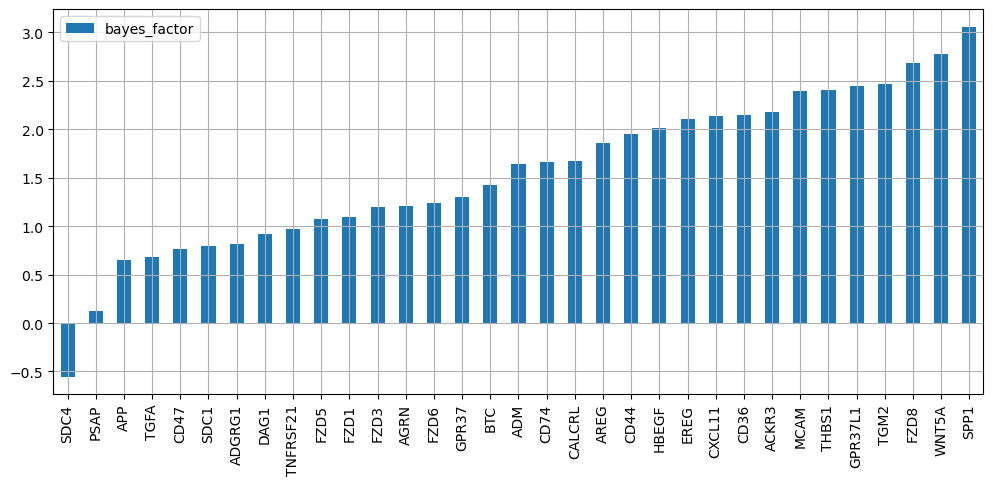

In [12]:
de.query("index in @all_genes").sort_values("bayes_factor")[["bayes_factor"]].fillna(1).plot(kind="bar", figsize=(12,5), grid=True)

<Axes: >

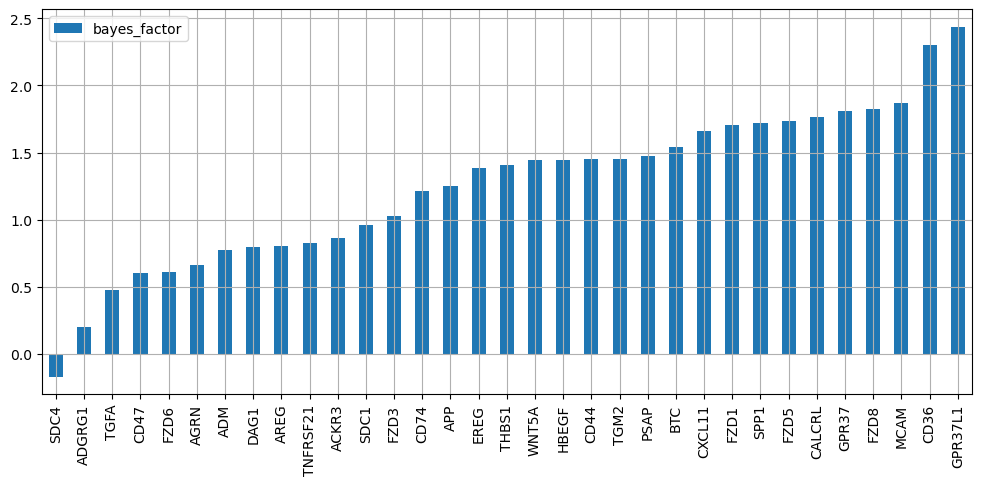

In [112]:
de.query("index in @all_genes").sort_values("bayes_factor")[["bayes_factor"]].fillna(1).plot(kind="bar", figsize=(12,5), grid=True)

<Axes: ylabel='Frequency'>

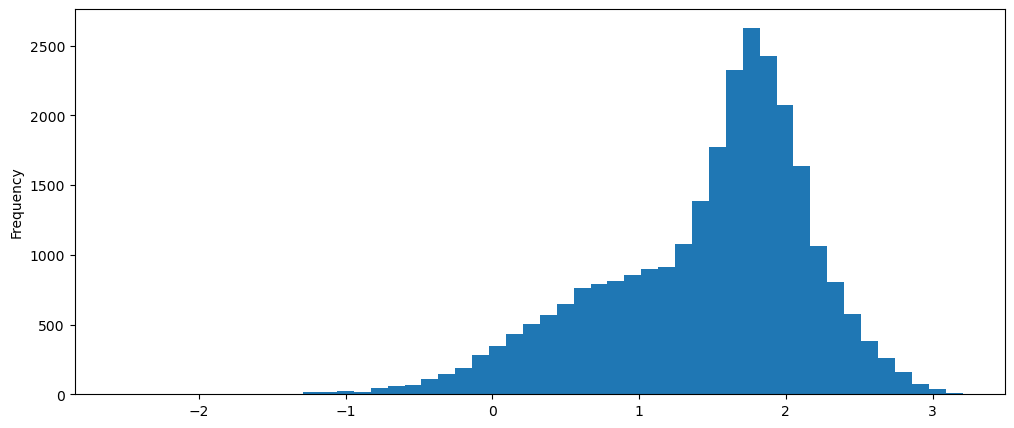

In [13]:
de["bayes_factor"].plot(kind="hist", bins=50, figsize=(12,5))

<Axes: ylabel='Frequency'>

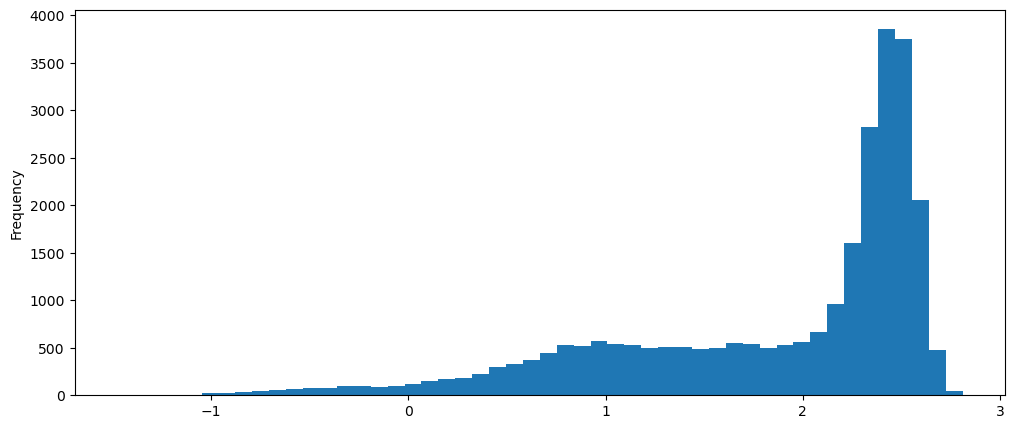

In [111]:
de["bayes_factor"].plot(kind="hist", bins=50, figsize=(12,5))

In [ ]:
de.to_csv("./2nd_run.csv")